In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
train_df = pd.read_csv('train.csv')

modes = train_df.mode().iloc[0] # Fill out the empty data

def proc_data(df):
    df.fillna(modes, inplace=True)

    
proc_data(train_df)

train_df['TotalSpending'] = np.log((train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['RoomService'] + train_df['VRDeck'] + train_df['Spa']) + 1)
train_df['LivingLocation'] = train_df['Cabin'].str[-1].map( { 'S': 0, 'P': 1}).astype(int)
train_df['CryoSleep'] = (train_df['CryoSleep']).astype(int)

In [123]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)



,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


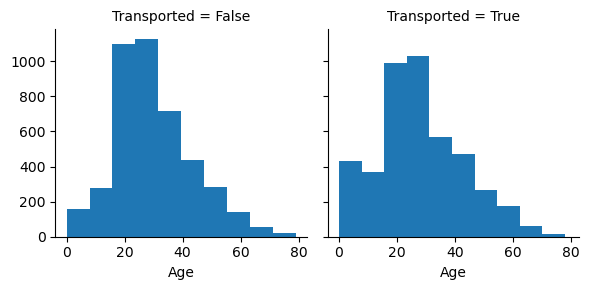

In [124]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=10)

In [125]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


In [126]:
train_df[['VIP', 'Age', 'Transported']].groupby(['VIP'], as_index=False).mean()

,VIP,Age,Transported
0,False,28.525783,0.506475
1,True,37.381910,0.381910


In [127]:
train_df[['RoomService', 'Transported']].groupby(['RoomService'], as_index=False).mean()

,RoomService,Transported
0,0.0,0.627822
1,1.0,0.341880
2,2.0,0.405063
3,3.0,0.393443
4,4.0,0.191489
...,...,...
1268,8209.0,0.000000
1269,8243.0,0.000000
1270,8586.0,0.000000
1271,9920.0,0.000000


In [128]:
train_df[['FoodCourt', 'Transported']].groupby(['FoodCourt'], as_index=False).mean().sort_values(by='Transported',ascending=False)

,FoodCourt,Transported
1506,29813.0,1.0
985,1972.0,1.0
950,1778.0,1.0
955,1808.0,1.0
956,1809.0,1.0
...,...,...
386,474.0,0.0
929,1678.0,0.0
385,473.0,0.0
931,1706.0,0.0


In [129]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpending,LivingLocation
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.000000,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,6.602588,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,9.248021,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,8.551981,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,6.995766,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9.052165,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.000000,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,7.535830,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,8.442039,0


In [130]:
train_df[['TotalSpending', 'Transported']].groupby(['TotalSpending'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,TotalSpending,Transported
2009,8.903679,1.0
1908,8.733433,1.0
1953,8.809415,1.0
869,7.398174,1.0
870,7.398786,1.0
...,...,...
1082,7.658700,0.0
1081,7.657283,0.0
1080,7.656810,0.0
1079,7.655391,0.0


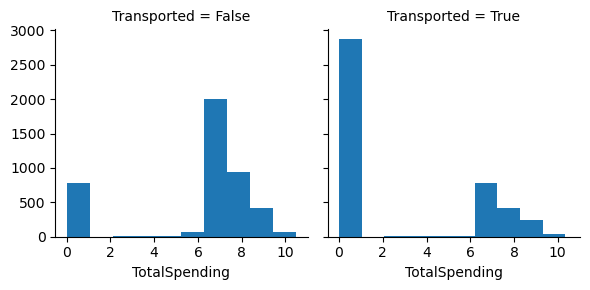

In [131]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'TotalSpending', bins=10)

In [133]:
train_df[['LivingLocation', 'Transported']].groupby(['LivingLocation'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,LivingLocation,Transported
0,0,0.552708
1,1,0.451260


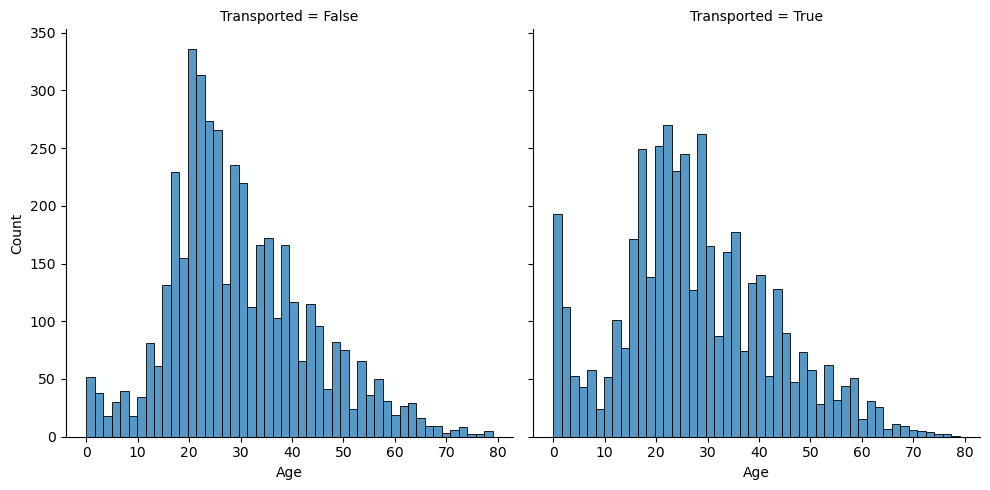

In [134]:
sns.displot(train_df, x="Age", col="Transported")

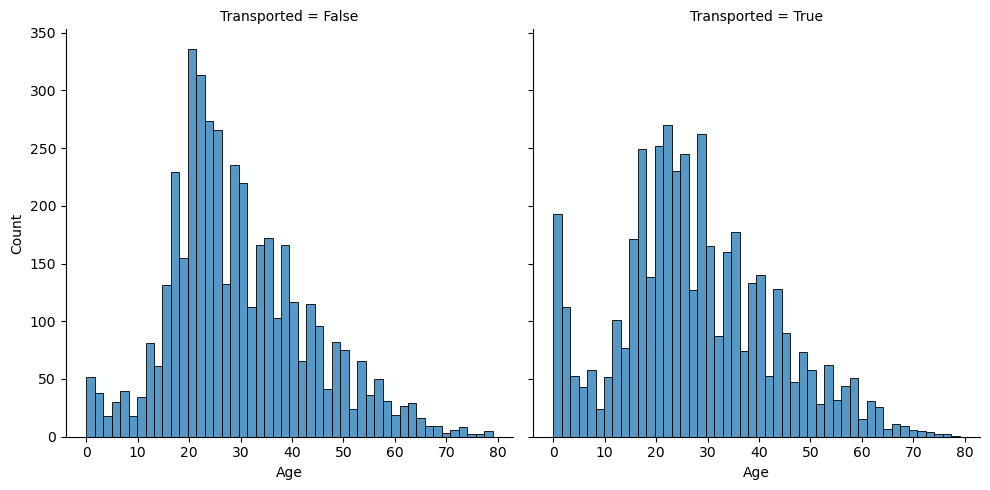

In [135]:
sns.displot(train_df, x="Age", col="Transported")

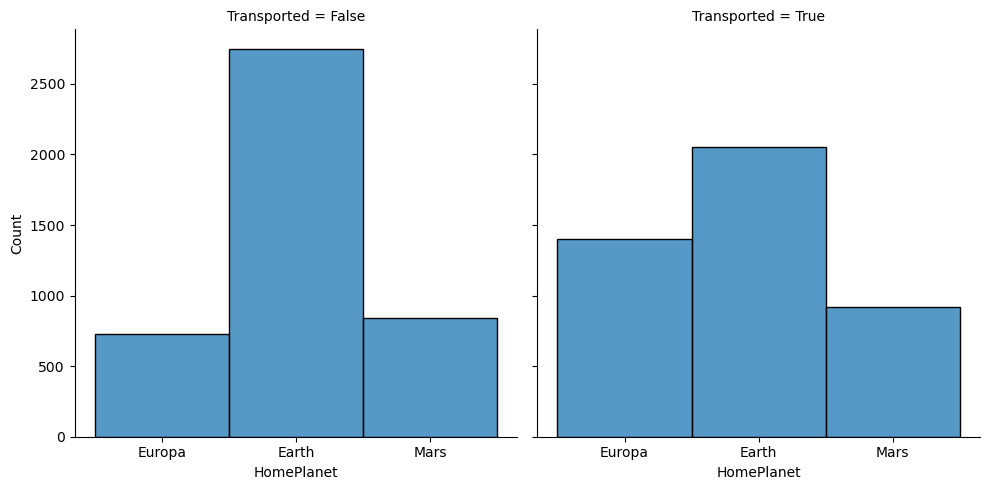

In [136]:
sns.displot(train_df, x="HomePlanet", col="Transported")

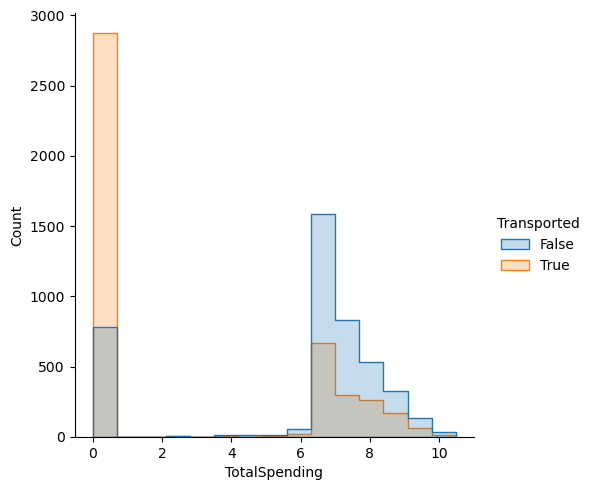

In [137]:
sns.displot(train_df, x="TotalSpending", hue="Transported", element="step")

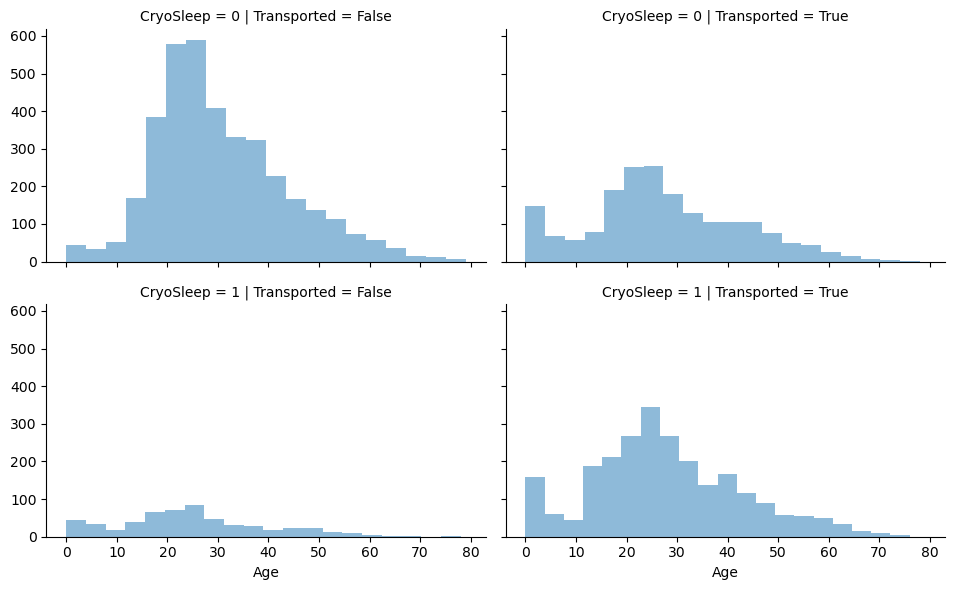

In [142]:
grid = sns.FacetGrid(train_df, row='CryoSleep', col='Transported', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

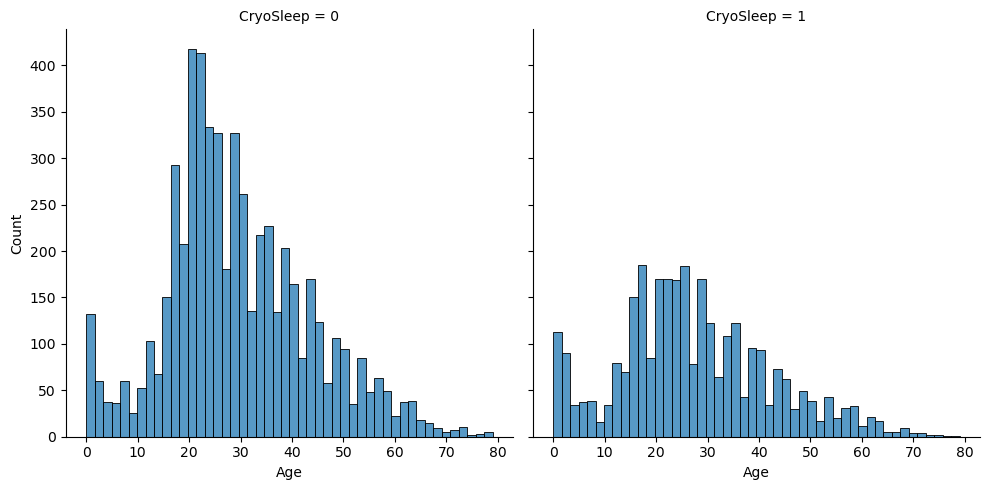

In [143]:
sns.displot(train_df, x="Age", col="CryoSleep")